## Import Library

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
df = pd.read_csv('sms_spam.csv')
df

,Unnamed: 0,v1,v2
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...
5568,5568,ham,Will _ b going to esplanade fr home?
5569,5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,5570,ham,The guy did some bitching but I acted like i'd...


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.rename(columns={'v1':'Type','v2':'Message'},inplace=True)
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
label_encoder = LabelEncoder()

df['Type'] = label_encoder.fit_transform(df['Type'])

df.head()

,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print(label_encoder.classes_)

['ham' 'spam']


**Check for missing values**

In [8]:
df.isnull().sum()

Type       0
Message    0
dtype: int64

**Check for duplicate values**

In [9]:
df.duplicated().sum()

np.int64(404)

In [10]:
df = df.drop_duplicates(keep='first')
df.shape

(5168, 2)

## Data Preprocessing

In [11]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

set lookup: O(1) time (fast)

list lookup: O(n) time (slow if the list is long)

In [12]:
def preprocess(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    token = []

    for word in tokens:
        if word.isalnum() :
            token.append(word)
    return ' '.join(token)    

In [13]:
df['Preprocessed_text'] = df['Message'].apply(preprocess)

In [14]:
df

,Type,Message,Preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do think he goes to usf he lives around ...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?,will b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other suggest...
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i b...


## Model Building and Testing

Here spam = 1 and ham = 0  
i.e.  spam = positive class and ham = negative class

In confusion matrix,    
**TP** = Spam predicted as spam    
**FP** = Ham wrongly predicted as spam    
**FN** = Spam wrongly predicted as ham    
**TN** = Ham correctly predicted as ham   

Our goal is classify in such a way that **Ham cannot wrongly predicted as spam**  or  **Predictio of Ham wrongly as spam must be very less**    

That's why we try to make ourr accuracy is higher with precision as 1 or almost near 1

In [15]:
X = df['Preprocessed_text']
y = df['Type']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y
)

In [17]:
import pandas as pd

# Convert y_train into a pandas Series
y_train_series = pd.Series(y_train)

# Now check counts
print(y_train_series.value_counts())


Type
0    3612
1     522
Name: count, dtype: int64


In [18]:
train_df = pd.DataFrame({"Message": X_train, "Type": y_train})
train_df

,Message,Type
5010,you have won a guaranteed 1000 cash or a 2000 ...,1
1095,ryder gibbs,0
742,just got up have to be out of the room very so...,0
3005,also hi wesley how you been,0
4475,i pick you up at about to go to taunton if you...,0
...,...,...
4139,leave it wif me lar wan to carry meh so heavy ...,0
4736,nt only for driving even for many reasons she ...,0
124,predict wat time finish buying,0
185,hello handsome are you finding that job not be...,0


**Apply to spam messages only**

In [19]:
spam_df = train_df[train_df["Type"] == 1]
spam_df

,Message,Type
5010,you have won a guaranteed 1000 cash or a 2000 ...,1
765,ur awarded a city break and could win a 200 su...,1
1377,double mins double txt price linerental on lat...,1
1047,1000 flirting now txt girl or bloke ur name ag...,1
1457,claire here am havin borin time am now alone u...,1
...,...,...
417,free entry into our 250 weekly competition jus...,1
5025,ur is currently 500 pounds to maximize ur now ...,1
2555,freemsg you have been awarded a free mini digi...,1
832,dear voucher holder to claim this weeks offer ...,1


**Paraphrasing Spam Messages Using Ollama LLaMA3**

In [20]:
import ollama
import re

augmented_spam = []

for text in spam_df["Message"]:
    response = ollama.chat(
        model="llama3",
        messages=[{"role": "user", "content": f"Paraphrase this spam message 4 times:\n{text}"}]
    )
    
    content = response['message']['content']
    paraphrases = content.split("\n")
    
    for para in paraphrases:
        para = para.strip()
        # Remove numbering/bullets (1., 2., 3., 4., -, • etc.)
        para = re.sub(r"^\d+\.\s*|\-\s*|\•\s*", "", para)
        
        # Skip meta lines like "Here are four paraphrased..."
        if para and not para.lower().startswith("here are"):
            augmented_spam.append([para, 1])

In [21]:
augmented_spam_df = pd.DataFrame(augmented_spam, columns=["Message", "Type"])


In [24]:
augmented_spam_df

,Message,Type
0,Congratulations! You've been selected as a win...,1
1,Exciting news! You've won a fantastic prize ei...,1
2,We're thrilled to inform you that you've won a...,1
3,"Big news! You've been selected as a winner, wi...",1
4,You've been selected for a fantastic getaway a...,1
...,...,...
2193,Don't miss out on your old account benefits! Y...,1
2194,**Version 3**,1
2195,Reminder: You have an unused balance from 2004...,1
2196,**Version 4**,1


Now We have to remove following labels from lines are present
- ** **Version 1****
- ** **Version 2****
- ** **Version 3****
- ** **Version 4**** 

In [40]:
import re

# Remove **Version X:** from the text
augmented_spam_df["Message"] = augmented_spam_df["Message"].apply(
    lambda x: re.sub(r"\*\*Version \d+:?\*\*", "", str(x)).strip()
)

# Save to Excel
augmented_spam_df.to_excel("cleaned_spam.xlsx", index=False)

After removing 'Version x:' from the rows, some of them become blank. Therefore, we need to remove those blank rows

In [44]:
# Drop rows where Message is empty after cleaning
augmented_spam_df = augmented_spam_df[augmented_spam_df["Message"].str.strip() != ""]

# Save to Excel
augmented_spam_df.to_excel("cleaned_spam.xlsx", index=False)

In [45]:
augmented_spam_df

,Message,Type
0,Congratulations! You've been selected as a win...,1
1,Exciting news! You've won a fantastic prize ei...,1
2,We're thrilled to inform you that you've won a...,1
3,"Big news! You've been selected as a winner, wi...",1
4,You've been selected for a fantastic getaway a...,1
...,...,...
2189,Reminder: If you'd like to activate your curre...,1
2191,You have outstanding rewards from 2004! Claim ...,1
2193,Don't miss out on your old account benefits! Y...,1
2195,Reminder: You have an unused balance from 2004...,1


In [46]:
augmented_spam_df['Message'] = augmented_spam_df['Message'].str.lower()
augmented_spam_df

,Message,Type
0,congratulations! you've been selected as a win...,1
1,exciting news! you've won a fantastic prize ei...,1
2,we're thrilled to inform you that you've won a...,1
3,"big news! you've been selected as a winner, wi...",1
4,you've been selected for a fantastic getaway a...,1
...,...,...
2189,reminder: if you'd like to activate your curre...,1
2191,you have outstanding rewards from 2004! claim ...,1
2193,don't miss out on your old account benefits! y...,1
2195,reminder: you have an unused balance from 2004...,1


**Merge back into training set**

In [47]:
train_df_augmented = pd.concat([train_df, augmented_spam_df], ignore_index=True)
train_df_augmented

,Message,Type
0,you have won a guaranteed 1000 cash or a 2000 ...,1
1,ryder gibbs,0
2,just got up have to be out of the room very so...,0
3,also hi wesley how you been,0
4,i pick you up at about to go to taunton if you...,0
...,...,...
6159,reminder: if you'd like to activate your curre...,1
6160,you have outstanding rewards from 2004! claim ...,1
6161,don't miss out on your old account benefits! y...,1
6162,reminder: you have an unused balance from 2004...,1


In [48]:
X_train_new1 = train_df_augmented['Message']
y_train_new = train_df_augmented['Type']

In [49]:
import pandas as pd

# Convert y_train into a pandas Series
y_train_new_series = pd.Series(y_train_new)

# Now check counts
print(y_train_new_series.value_counts())

Type
0    3612
1    2552
Name: count, dtype: int64


In [50]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_stop_stem(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 3. Filter + stem
    filtered = []
    for word in tokens:
        if word.isalnum() and word not in stop_words:
            stemmed = stemmer.stem(word)
            filtered.append(stemmed)
    
    # 4. Reconstruct
    return " ".join(filtered)

In [51]:
X_train_new = X_train_new1.apply(preprocess_stop_stem)
X_train_new

0       guarante 1000 cash 2000 prize claim yr prize c...
1                                              ryder gibb
2       got room soon put clock back til 8 shout every...
3                                          also hi wesley
4                         pick go taunton still want come
                              ...                        
6159    remind like activ current offer head link comp...
6160    outstand reward 2004 claim 786 point call 0871...
6161    miss old account benefit 2004 account 07xxxxxx...
6162    remind unus balanc 2004 worth 786 point redeem...
6163    import updat old account 07xxxxxxxxx still 786...
Name: Message, Length: 6164, dtype: object

In [52]:
X_test = X_test.apply(preprocess_stop_stem)

**Text Vectorization using TF-IDF (Unigrams & Bigrams)**

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000,ngram_range=(1,2))

In [55]:
# Fit only on augmented training set
X_train_vec = tfidf.fit_transform(X_train_new).toarray()

# Transform the untouched test set with the same vectorizer
X_test_vec = tfidf.transform(X_test).toarray()

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'M_NB': mnb,
    'B_NB': bnb, 
    'G_NB': gnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')  # use 'binary' for 0/1 or 'macro' for multi-class
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    report = classification_report(y_test, y_pred)
    
    return acc, prec, rec, f1, report

In [62]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_report = train_classifier(
        clf, X_train_vec, y_train_new, X_test_vec, y_test
    )
    
    print(f"\nFor {name}:")
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    print("Recall -", current_recall)
    print("F1-score -", current_f1)
    print("Classification Report:\n", current_report)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)


For SVC:
Accuracy - 0.9758220502901354
Precision - 0.8888888888888888
Recall - 0.9230769230769231
F1-score - 0.9056603773584906
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       904
           1       0.89      0.92      0.91       130

    accuracy                           0.98      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034


For KN:
Accuracy - 0.9187620889748549
Precision - 1.0
Recall - 0.35384615384615387
F1-score - 0.5227272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       904
           1       1.00      0.35      0.52       130

    accuracy                           0.92      1034
   macro avg       0.96      0.68      0.74      1034
weighted avg       0.93      0.92      0.90      1034


For M_NB:
Accuracy - 0.9535783365570599
Precision - 0.

In [63]:
import pandas as pd

# Create performance DataFrame
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Sort by F1-score descending
performance_df = performance_df.sort_values('Precision', ascending=False)

# Reset index for cleaner display
performance_df = performance_df.reset_index(drop=True)

print(performance_df)

   Algorithm  Accuracy  Precision    Recall  F1-score
0         KN  0.918762   1.000000  0.353846  0.522727
1       B_NB  0.974855   0.990566  0.807692  0.889831
2        SVC  0.975822   0.888889  0.923077  0.905660
3        ETC  0.970986   0.873134  0.900000  0.886364
4         RF  0.970019   0.872180  0.892308  0.882129
5        xgb  0.958414   0.853659  0.807692  0.830040
6       G_NB  0.964217   0.825175  0.907692  0.864469
7         LR  0.958414   0.804196  0.884615  0.842491
8       M_NB  0.953578   0.762821  0.915385  0.832168
9       GBDT  0.935203   0.748031  0.730769  0.739300
10       BgC  0.928433   0.677215  0.823077  0.743056
11        DT  0.897485   0.600000  0.553846  0.576000
12  AdaBoost  0.882012   0.527027  0.600000  0.561151


In [64]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KN,0.918762,1.000000,0.353846,0.522727
1,B_NB,0.974855,0.990566,0.807692,0.889831
2,SVC,0.975822,0.888889,0.923077,0.905660
3,ETC,0.970986,0.873134,0.900000,0.886364
4,RF,0.970019,0.872180,0.892308,0.882129
5,xgb,0.958414,0.853659,0.807692,0.830040
6,G_NB,0.964217,0.825175,0.907692,0.864469
7,LR,0.958414,0.804196,0.884615,0.842491
8,M_NB,0.953578,0.762821,0.915385,0.832168
9,GBDT,0.935203,0.748031,0.730769,0.739300


**Voting Classifier**

In [65]:
from sklearn.ensemble import VotingClassifier

In [66]:
voting = VotingClassifier(estimators=[('svm', svc), ('B_NB', bnb),('et',etc),('rf',rfc)],voting='soft')

In [67]:
voting.fit(X_train_vec,y_train_new)

,estimators,"[('svm', ...), ('B_NB', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


Accuracy: 0.9806576402321083
Precision: 0.9661016949152542
Recall: 0.8769230769230769
F1 Score: 0.9193548387096774

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.97      0.88      0.92       130

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



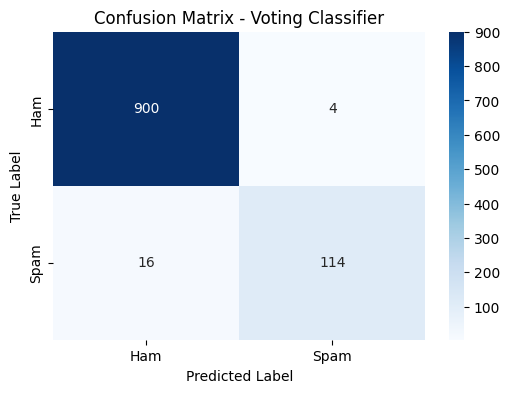

In [68]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, 
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = voting.predict(X_test_vec)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()


ROC AUC Score: 0.9886147038801907


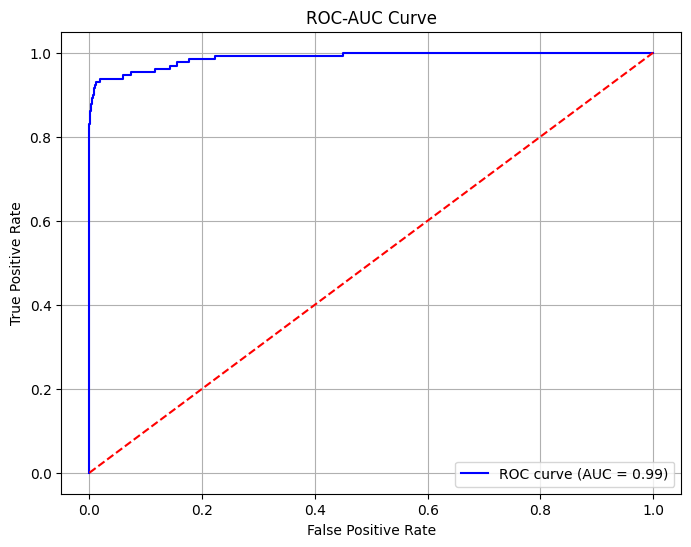

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class (Spam = 1)
y_prob = voting.predict_proba(X_test_vec)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Applying stacking**

In [70]:
from sklearn.ensemble import StackingClassifier

In [71]:
final_estimator=RandomForestClassifier()

clf = StackingClassifier(estimators=[('svm', svc), ('B_NB', bnb),('rf',rfc),('et',etc)], final_estimator=final_estimator)

In [72]:
clf.fit(X_train_vec,y_train_new)

,estimators,"[('svm', ...), ('B_NB', ...), ...]"
,final_estimator,RandomForestClassifier()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0


Accuracy: 0.9709864603481625
Precision: 0.8378378378378378
Recall: 0.9538461538461539
F1 Score: 0.8920863309352518

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       904
           1       0.84      0.95      0.89       130

    accuracy                           0.97      1034
   macro avg       0.92      0.96      0.94      1034
weighted avg       0.97      0.97      0.97      1034



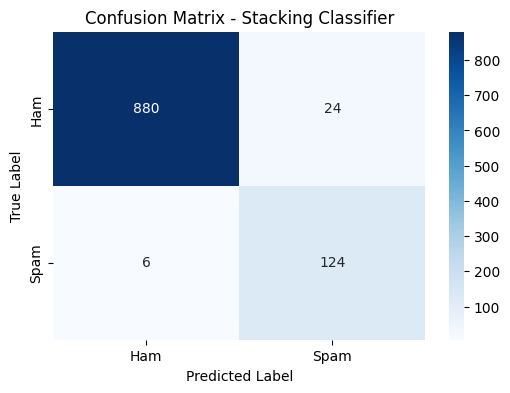

In [73]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, 
    recall_score, f1_score, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions using StackingClassifier
y_pred_stack = clf.predict(X_test_vec)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Precision:", precision_score(y_test, y_pred_stack))
print("Recall:", recall_score(y_test, y_pred_stack))
print("F1 Score:", f1_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    cm_stack, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


ROC AUC Score: 0.978139891082369


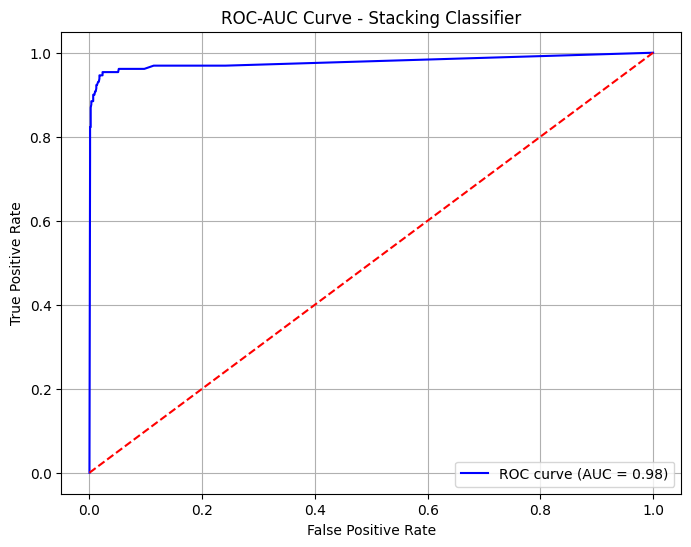

In [74]:
# Get predicted probabilities for positive class (Spam = 1)
y_prob_stack = clf.predict_proba(X_test_vec)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_stack)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob_stack)
print("ROC AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Stacking Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
